In [99]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load CSV Files
team_data = pd.read_csv('team_data.csv')
salaries = pd.read_csv('salaries.csv')

team_data = team_data.loc[(team_data['yearID'] >= 1985) & (team_data['yearID'] <= 2016)]
team_data = team_data[['yearID', 'teamID', 'Rank', 'G', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', 'HR', 'RA', 'ERA', 'ER', 'FP', 'HA', 'BBA', 'E']]

salaries = salaries[['yearID', 'teamID', 'salary']]
total_salaries = salaries.groupby(['yearID', 'teamID']).sum()

total_salaries.reset_index(drop=True, inplace=True)
team_data.reset_index(drop=True, inplace=True)
total_salaries_series = total_salaries['salary']
team_data['TSalary'] = total_salaries_series
team_data['WPct'] = round(team_data['W'] / team_data['G'], 4)

salaries2 = team_data[['yearID', 'TSalary']]
season_mean = salaries2.groupby(['yearID']).mean()
season_std = salaries2.groupby(['yearID']).std()
season_mean = season_mean.reset_index()
season_std = season_std.reset_index()
series_mean = []
series_std = []
for index in range(len(team_data)):
    year = team_data['yearID'][index]
    mean = season_mean['TSalary'][year-1985]
    series_mean.append(mean)
for index in range(len(team_data)):
    year = team_data['yearID'][index]
    mean = season_std['TSalary'][year-1985]
    series_std.append(mean)

team_data['SalaryMean'] = series_mean
team_data['SalaryStDev'] = series_std
team_data['Z-Score'] = round((team_data['TSalary'] - team_data['SalaryMean'])/(team_data['SalaryStDev']), 4)

In [152]:
team_data['DivWin'] = pd.get_dummies(team_data['DivWin'])['Y']

In [153]:
team_data['LgWin'] = pd.get_dummies(team_data['LgWin'])['Y']

In [154]:
team_data['WSWin'] = pd.get_dummies(team_data['WSWin'])['Y']

In [155]:
team_data.head()

,yearID,teamID,Rank,G,W,L,DivWin,WCWin,LgWin,WSWin,...,FP,HA,BBA,E,TSalary,WPct,SalaryMean,SalaryStDev,Z-Score,RPG
0,1985,ATL,5,162,66,96,0,NaN,0,0,...,0.976,1512,642,159,14807000,0.4074,1.007557e+07,2.470845e+06,1.9149,3.901235
1,1985,BAL,4,161,83,78,0,NaN,0,0,...,0.979,1480,568,129,11560712,0.5155,1.007557e+07,2.470845e+06,0.6011,5.080745
2,1985,BOS,5,163,81,81,0,NaN,0,0,...,0.977,1487,540,145,10897560,0.4969,1.007557e+07,2.470845e+06,0.3327,4.907975
3,1985,CAL,2,162,90,72,0,NaN,0,0,...,0.982,1453,514,112,14427894,0.5556,1.007557e+07,2.470845e+06,1.7615,4.518519
4,1985,CHA,3,163,85,77,0,NaN,0,0,...,0.982,1411,569,111,9846178,0.5215,1.007557e+07,2.470845e+06,-0.0928,4.515337


In [3]:
linear_model = LinearRegression()

In [4]:
linear_model.fit(team_data[['R', 'RA']], team_data['W'])
slope = linear_model.coef_
slope

array([ 0.11262608, -0.0924196 ])

In [5]:
linear_model.score(team_data[['R', 'RA']], team_data['W'])

0.7698955054429655

In [6]:
div_model = LogisticRegression()

In [11]:
div_model.fit(team_data[['R', 'RA']], team_data['DivWin'])
slope = div_model.coef_
slope

array([[ 0.02258885, -0.02639683]])

In [13]:
div_model.score(team_data[['R', 'RA']], team_data['DivWin'])

0.8529411764705882

In [14]:
lg_model = LogisticRegression()

In [18]:
lg_model.fit(team_data[['R', 'RA']], team_data['LgWin'])
slope = lg_model.coef_
slope

array([[ 0.01463289, -0.0197152 ]])

In [20]:
lg_model.score(team_data[['R', 'RA']], team_data['LgWin'])

0.9291938997821351

In [21]:
ws_model = LogisticRegression()

In [22]:
ws_model.fit(team_data[['R', 'RA']], team_data['WSWin'])
slope = ws_model.coef_
slope

array([[ 0.01191728, -0.01782079]])

In [23]:
ws_model.score(team_data[['R', 'RA']], team_data['WSWin'])

0.9662309368191722

In [26]:
ws_model.predict_proba([[896, 700]])

array([[0.85774536, 0.14225464]])

In [27]:
ws_model.predict_proba([[732, 697]])

array([[0.97581781, 0.02418219]])

In [29]:
X_train, X_test, win_train, win_test = train_test_split(team_data[['R', 'RA']], team_data['W'], test_size=.25, random_state=15)

In [58]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train, win_train)

LinearRegression()

In [59]:
predict_1 = linear_model_2.predict(X_test)
for index in range(len(predict_1)):
    predict_1[index] = round(predict_1[index], 0)
accuracy = predict_1 == win_test
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the test set is: {}%".format(percent_correct))

The accuracy of the model in the test set is: 13.478260869565217%


In [61]:
predict_2 = linear_model_2.predict(X_train)
for index in range(len(predict_2)):
    predict_2[index] = round(predict_2[index], 0)
accuracy_2 = predict_2 == win_train
percent_correct_2 = len(accuracy_2.loc[accuracy_2 == True]) / len(accuracy_2) * 100
print("The accuracy of the model in the training set is: {}%".format(percent_correct_2))

The accuracy of the model in the training set is: 8.430232558139535%


In [62]:
difference_1 = predict_1 - win_test
difference_1.mean()

0.21739130434782608

In [63]:
difference_1.std()

5.68577879460977

In [64]:
difference_12 = abs(predict_1 - win_test)
difference_12.mean()

4.017391304347826

In [65]:
difference_12.std()

4.020651077423526

In [66]:
difference_2 = predict_2 - win_train
difference_2.mean()

0.011627906976744186

In [67]:
difference_2.std()

5.708073775385734

In [68]:
difference_22 = abs(predict_2 - win_train)
difference_22.mean()

4.136627906976744

In [69]:
difference_22.std()

3.9300945717819786

In [70]:
X_train, X_test, div_train, div_test = train_test_split(team_data[['R', 'RA']], team_data['DivWin'], test_size=.25, random_state=15)

In [71]:
div_model_2 = LogisticRegression().fit(X_train, div_train)
predict_3 = div_model_2.predict(X_test)
accuracy = predict_3 == div_test
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the test set is: {}%".format(percent_correct))

The accuracy of the model in the test set is: 90.8695652173913%


In [72]:
predict_4 = div_model_2.predict(X_train)
accuracy = predict_4 == div_train
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the training set is: {}%".format(percent_correct))

The accuracy of the model in the training set is: 83.86627906976744%


In [73]:
X_train, X_test, lg_train, lg_test = train_test_split(team_data[['R', 'RA']], team_data['LgWin'], test_size=.25, random_state=15)

In [74]:
lg_model_2 = LogisticRegression().fit(X_train, lg_train)
predict_5 = lg_model_2.predict(X_test)
accuracy = predict_5 == div_test
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the test set is: {}%".format(percent_correct))

The accuracy of the model in the test set is: 83.04347826086956%


In [75]:
predict_5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

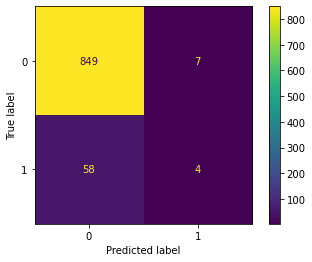

In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# true labels and predicted labels
lg_true = team_data['LgWin']
lg_pred = lg_model.predict(team_data[['R', 'RA']])

plot_confusion_matrix(
    lg_model, 
    team_data[['R', 'RA']], 
    lg_true, 
)
plt.show()

In [77]:
print(classification_report(lg_true, lg_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       856
           1       0.36      0.06      0.11        62

    accuracy                           0.93       918
   macro avg       0.65      0.53      0.54       918
weighted avg       0.90      0.93      0.91       918



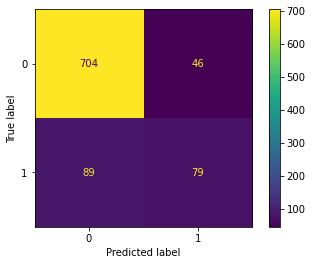

In [78]:
div_true = team_data['DivWin']
div_pred = div_model.predict(team_data[['R', 'RA']])

plot_confusion_matrix(
    div_model, 
    team_data[['R', 'RA']], 
    div_true, 
)
plt.show()

In [79]:
print(classification_report(div_true, div_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       750
           1       0.63      0.47      0.54       168

    accuracy                           0.85       918
   macro avg       0.76      0.70      0.73       918
weighted avg       0.84      0.85      0.84       918



In [81]:
X_train, X_test, ws_train, ws_test = train_test_split(team_data[['R', 'RA']], team_data['WSWin'], test_size=.25, random_state=15)

In [82]:
ws_model_2 = LogisticRegression().fit(X_train, ws_train)
predict_6 = ws_model_2.predict(X_test)
accuracy = predict_6 == ws_test
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the test set is: {}%".format(percent_correct))

The accuracy of the model in the test set is: 98.69565217391305%


In [83]:
predict_7 = ws_model_2.predict(X_train)
accuracy = predict_7 == ws_train
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the training set is: {}%".format(percent_correct))

The accuracy of the model in the training set is: 95.93023255813954%


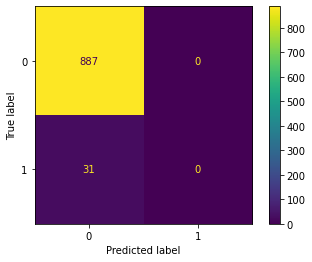

In [166]:
ws_true = team_data['WSWin']
ws_pred = ws_model.predict(team_data[['R', 'RA']])

plot_confusion_matrix(
    ws_model, 
    team_data[['R', 'RA']], 
    ws_true, 
)
plt.show()

In [167]:
print(classification_report(ws_true, ws_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       887
           1       0.00      0.00      0.00        31

    accuracy                           0.97       918
   macro avg       0.48      0.50      0.49       918
weighted avg       0.93      0.97      0.95       918



C:\Users\brady\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
team_data['RPG'] = team_data['R'] / team_data['G']

In [156]:
linear_model_fielding = LinearRegression().fit(team_data[['R', 'ERA', 'FP']], team_data['W'])
linear_model_fielding.score(team_data[['R', 'ERA', 'FP']], team_data['W'])

0.8823957425858114

In [157]:
linear_model_fielding = LinearRegression().fit(team_data[['R', 'ERA', 'FP','Z-Score']], team_data['W'])
linear_model_fielding.score(team_data[['R', 'ERA', 'FP', 'Z-Score']], team_data['W'])

0.882884389476992

In [158]:
linear_model_fielding.coef_

array([ 9.76782975e-02, -1.59241650e+01,  4.39639047e+02,  2.84012015e-01])

In [104]:
linear_model_runs = LinearRegression().fit(team_data[['R', 'RA']], team_data['W'])

In [105]:
linear_model_runs.score(team_data[['R', 'RA']], team_data['W'])

0.7698955054429655

In [122]:
linear_model_runs_2 = LinearRegression().fit(team_data[['R', 'ERA']], team_data['W'])
linear_model_runs_2.score(team_data[['R', 'ERA']], team_data['W'])

0.8692013270953971

In [180]:
linear_model_runs_2.coef_

array([  0.10158552, -16.5114034 ])

In [124]:
linear_model_many = LinearRegression().fit(team_data[['R', 'ERA', 'FP', 'E', 'Z-Score']], team_data['W'])
linear_model_many.score(team_data[['R', 'ERA', 'FP', 'E', 'Z-Score']], team_data['W'])

0.8829168139229643

In [125]:
#Use this model
linear_model_fielding = LinearRegression().fit(team_data[['R', 'ERA', 'FP']], team_data['W'])
linear_model_fielding.score(team_data[['R', 'ERA', 'FP']], team_data['W'])

0.8823957425858114

In [176]:
linear_model_fielding.coef_

array([ 9.76782975e-02, -1.59241650e+01,  4.39639047e+02,  2.84012015e-01])

In [179]:
linear_model_fielding_2 = LinearRegression().fit(team_data[['R', 'ER', 'FP']], team_data['W'])
linear_model_fielding_2.score(team_data[['R', 'ER', 'FP']], team_data['W'])

0.779192448450716

In [127]:
X_train, X_test, w_train, w_test = train_test_split(team_data[['R', 'ERA', 'FP']], team_data['W'], test_size=.25, random_state=15)

In [128]:
linear_model_train = LinearRegression()
linear_model_train.fit(X_train, w_train)

LinearRegression()

In [134]:
predict_10 = linear_model_train.predict(X_test)
for index in range(len(predict_10)):
    predict_10[index] = round(predict_10[index], 0)
accuracy = predict_10 == w_test
percent_correct = len(accuracy.loc[accuracy == True]) / len(accuracy) * 100
print("The accuracy of the model in the test set is: {}%".format(percent_correct))

The accuracy of the model in the test set is: 11.73913043478261%


In [135]:
predict_11 = linear_model_train.predict(X_train)
for index in range(len(predict_11)):
    predict_11[index] = round(predict_11[index], 0)
accuracy_2 = predict_11 == w_train
percent_correct_2 = len(accuracy_2.loc[accuracy_2 == True]) / len(accuracy_2) * 100
print("The accuracy of the model in the training set is: {}%".format(percent_correct_2))

The accuracy of the model in the training set is: 10.029069767441861%


In [136]:
difference_1 = predict_10 - w_test
difference_1.mean()

0.07391304347826087

In [138]:
difference_2 = abs(predict_10 - w_test)
difference_2.mean()

3.0739130434782607

<AxesSubplot:xlabel='W', ylabel='Count'>

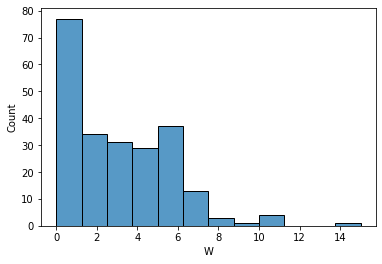

In [140]:
sns.histplot(difference_2)

<AxesSubplot:xlabel='W', ylabel='Count'>

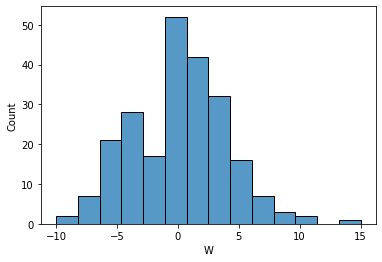

In [141]:
sns.histplot(difference_1)

In [163]:
league_winners = team_data.loc[team_data['LgWin'] == 1]

In [164]:
ws_model_league = LogisticRegression().fit(league_winners[['R', 'ERA', 'FP']], league_winners['WSWin'])

In [165]:
ws_model_league.score(league_winners[['R', 'ERA', 'FP']], league_winners['WSWin'])

0.5806451612903226

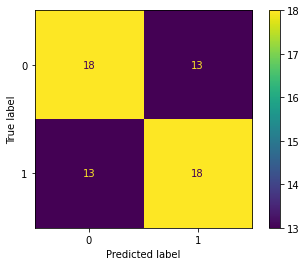

In [175]:
ws_true_2 = league_winners['WSWin']
ws_pred_2 = ws_model_league.predict(league_winners[['R', 'ERA', 'FP']])

plot_confusion_matrix(
    ws_model_league, 
    league_winners[['R', 'ERA', 'FP']], 
    ws_true_2, 
)
plt.show()